<center>
<img src="https://github.com/FUlyankin/yet_another_matstat_course/blob/main/hw_2024/images/AB.jpeg?raw=true" height="200"> 

# Прикладаная статистика: домашнее задание 2
</center>

> скрррааа па па ка ка ка скидики па па энд э пу пу дррр бум скьа ду ду ку ку тун тун пум пум

$\qquad$ [БутcРэп](https://www.youtube.com/watch?v=eE4qxB2E8d4)

**ФИО:**

## Общая информация


__Дата выдачи:__ 10.04.2024

__Мягкий дедлайн:__ 23:59MSK 05.05.2024

__Жесткий дедлайн:__ 23:59MSK 12.05.2024

## Оценивание и штрафы

В этой домашней работе мы с вами отточим навыки проверки гипотез и стротельства доверительных интервалов. 

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 120 баллов. Всё, что выше сотни -- бонусные баллы. 

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-01-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет, как обычно, сдать в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Проверка гипотез

Для начала повторим теорию проверки гипотез и поотвечаем на различные вопросы. 

> Ниже вас ждут несколько примеров гипотез, на которые вам нужно получить статистически значимые ответы. Вы можете пользоваться встроенными функциями тестов, можете писать свои, а можете использовать с семинаров – это не влияет на полученные баллы. Вы также оставляете за собой право выбрать, проверять гипотезу через `p-value`, по критическим значениям или вообще по с помощью доверительных интервалов (но здесь будьте осторожнее, особенно, когда у вас 2 выборки). 

__Здесь важно:__

- Правильно посчитать `p-value` либо наблюдаемое значение критерия (либо дов. интервал);
- Правильно сделать вывод об отвержении / не отвержении нулевой гипотезы;
- Правильно выбрать тест для проверки и обосновать, почему вы выбрали именно его.

Гипотезы проверяйте на $5\%$ уровне значимости

### Задача 1: экзамен (15 баллов)

<center>
<img src="https://github.com/FUlyankin/yet_another_matstat_course/blob/main/hw_2024/images/exam.jpeg?raw=true" width="400">
</center>
<br>

- Справочный материал с кодом: [тетрадка 1](https://github.com/FUlyankin/matstat-AB/blob/main/week09_hypo/10_13_python_mouse_and_man.ipynb) и [тетрадка 2](https://github.com/FUlyankin/matstat-AB/blob/main/week09_hypo/14_python_dependent.ipynb)
- [Серия из видео с его объяснением](https://www.youtube.com/watch?v=r1yD-vfli-g&list=PLCf-cQCe1FRxTgNPwcRSkBjvtE8DEm7rU&index=10)

У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [4]:
df = pd.read_csv('data/students_exam.csv')
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college). 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [106]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
high = df[(df['parental level of education'] == "associate's degree") |
          (df['parental level of education'] == "bachelor's degree") |
          (df['parental level of education'] == "master's degree")]

middle = df[(df['parental level of education'] == "high school") |
            (df['parental level of education'] == "some high school") |
            (df['parental level of education'] == "some college")]

print(f'''
      Средний балл для студентов высшего образования 
      {high["math score"].mean()} и среднего: {middle["math score"].mean()}

      Количество наблюдений: {high.shape[0]}, {middle.shape[0]}

      Сравнение дисперсий двух выборок: {np.var(high["math score"])}, {np.var(middle["math score"])}
''')


      Средний балл для студентов высшего образования 
      68.60401002506266 и среднего: 64.41930116472545

      Количество наблюдений: 399, 601

      Сравнение дисперсий двух выборок: 226.02364306756868, 225.13533461978233



In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].boxplot(x, y1)
axs[1].plot(x, y2)

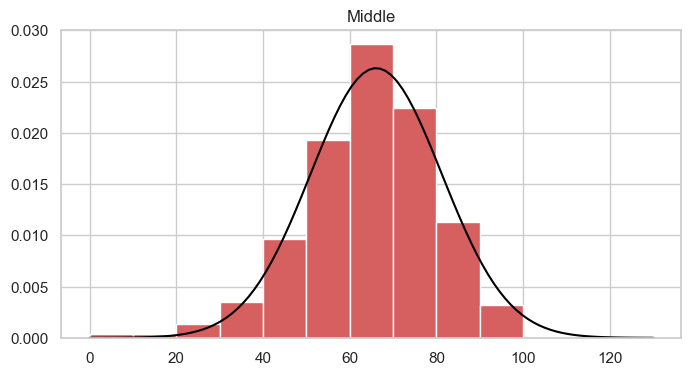

In [122]:
xs = np.linspace(0, 130, 100)
ys = sts.norm(loc= df['math score'].mean(), scale=df['math score'].std()).pdf(xs)
plt.title('Middle')
plt.hist(middle["math score"], color= 'r', density= True)
plt.plot(xs, ys, color="black");

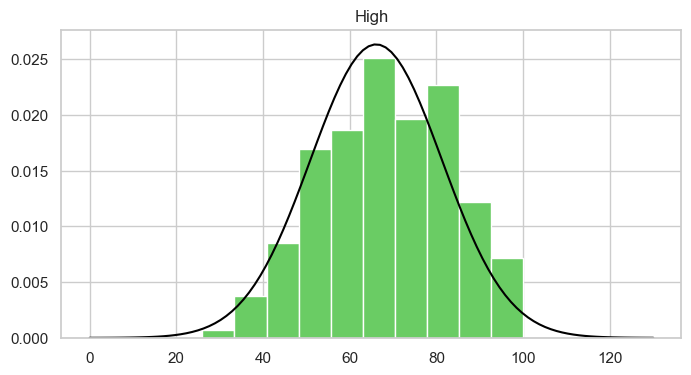

In [63]:
plt.title('High')
plt.hist(high["math score"], color= 'g', density= True)
plt.plot(xs, ys, color="black");

In [110]:
sts.ttest_ind(a= high["math score"], b= middle["math score"], equal_var=True, alternative= 'greater')

TtestResult(statistic=4.311126649886476, pvalue=8.926343543260077e-06, df=998.0)

Т.к. p-value сильно меньше 0.05, то гипотеза H0 отвергается  

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ 
* Распределение наблюдаемых величин имеют куполообразную форму
* Отношение большей дисперсии выборки к меньшей дисперсии выборки составляет меньше 4
* Предполагаю, что данные независимы

 
=> допускается применение двухвыборочного t-теста допускающего равенство дисперсий + необходимо применить односторонний критерий

__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

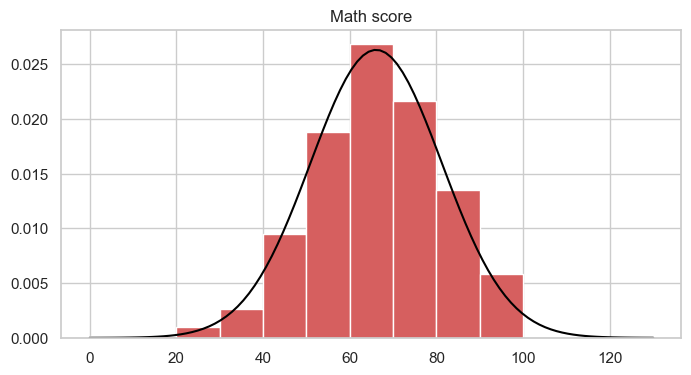

In [113]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

xs = np.linspace(0, 130, 100)
ys = sts.norm(loc= df['math score'].mean(), scale=df['math score'].std()).pdf(xs)
plt.title('Math score')
plt.hist(df['math score'], color= 'r', density= True)
plt.plot(xs, ys, color="black");

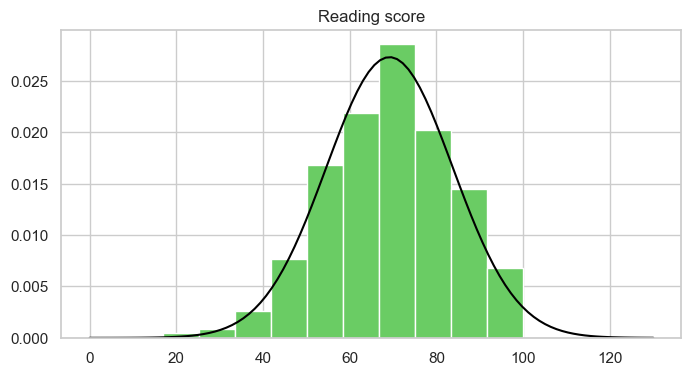

In [123]:
xs = np.linspace(0, 130, 100)
ys = sts.norm(loc= df['reading score'].mean(), scale=df['reading score'].std()).pdf(xs)
plt.title('Reading score')
plt.hist(df['reading score'], color= 'g', density= True)
plt.plot(xs, ys, color="black");

Коэффициент коррелции Пирсона: 0.8175796636720546


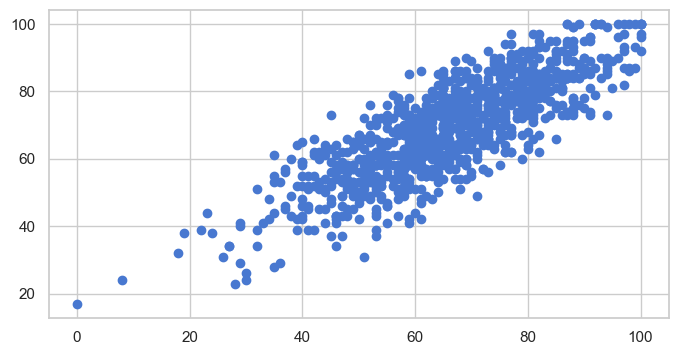

In [119]:
plt.scatter(df['math score'], df['reading score']);
print(f'Коэффициент коррелции Пирсона: {np.corrcoef(df["reading score"], df["math score"])[0, 1]}')

In [120]:
sts.ttest_rel(df['math score'], df['reading score'])

TtestResult(statistic=-10.816230631665421, pvalue=7.322335900414138e-26, df=999)

Т.к. p-value сильно меньше 0.05, Н0 о равенсте средних отвергается

__в)__ __[5 баллов]__ Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?

__Ответ:__ 
* нельзя утверждать, что данные независимы
* применяется двухсторонний критерий
* распределение данных имеет куполообразную форму

=> допускается применение двухвыборочного t-теста для зависимых выборок

### Задача 2: мыши и зеркало (20 баллов)

- Справочный материал с кодом: [тетрадка](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/08_python_non_parametric.ipynb) 
- [Серия из видео с его объяснением](https://www.youtube.com/watch?v=u22iOcKonz8&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=4)


$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

<center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif" height="300">
</center>
<br>

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом. 

In [ ]:
x = pd.read_csv('data/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

__а) [5 баллов]__ Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Найдите получившееся значение pvalue.

__Ответ:__ 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__б) [5 баллов]__  Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Зайдите получившееся значение pvalue.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__в) [5 баллов]__  Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  айдите получившееся значение pvalue.

In [ ]:
from statsmodels.stats.weightstats import ztest,zconfint

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__г) [5 баллов]__  Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

__Ответ:__

### Задача 3: парадокс Симпсона (35 баллов)

<center>
<img src="https://github.com/FUlyankin/yet_another_matstat_course/blob/main/hw_2024/images/simpson.jpg?raw=true" width="400">
<center\>
<br>



Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин? 

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [ ]:
men = np.array([[770,880],[88,135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__в)__ __[10 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__д)__ __[5 баллов]__  Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде. 

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

### Задача 4: дискриминация (20 баллов)

- [Тетрадка со справочным кодом](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/10_python_bootstrap.ipynb)
- [Видео с объяснением](https://www.youtube.com/watch?v=oRCzEPDMPBQ&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=7)

Компания Verizon - основная региональная телекоммуникационная компания в западной части США. Она отвечает за поддержание наземной телефонной связи (Incumbent Local Exchange Carrier, ILEC). Кроме того, она продаёт услуги междугородней связи, как и ряд её конкурентов, получивших название (Competing Local Exchange Carriers, CLEC).

Когда что-то шло не так, Verizon отвечала за ремонт своего оборудования и оборудования конкурентов. Она должна была делать ремонт оборудования конкурентов также быстро, как и ремонт своего оборудования. За этим следила комиссия по коммунальным услугам. 

Периодически возникали подозрения, что Verizon ремонтирует чужое оборудование медленнее. Тим Хестерберг, автор [отличной статьи про бустрап,](https://arxiv.org/pdf/1411.5279.pdf) консультировал компанию Verizon во время слушаний о нарушениях. Комиссия сравнивала время ремонта для Verizon и других компаний. Чтобы определить есть ли нарушения, в каждом случае, она проверяла гипотезу о равенстве средних на уровне значимости $1\%$. 

Если более $1\%$ тестов оказывались значимыми, компания должна была бы заплатить высокий штраф. Гипотезы проверялись с помощью $t$-статистик. После консультации Тима, Verizon предложила использовать тесты, робастные к выбросам и никак не завязанные на нормальность исходных распределений.

Мы в этом задании попробуем ответить на тот же вопрос, связанный с дискриминацией, но с помощью бустрапа. Для этого мы построим доверительный интервал для разности медиан и посмотрим входит ли в него ноль. Будем использовать уровень значимости в $1\%$. Доверительный интервал будем строить для одной CLEC-комиании и для Verizon.

In [ ]:
df = pd.read_csv('data/verizon.txt', sep='\t')
print(df.shape)

# ILEC - Verizion
# CLEC - внешние клиенты 
df.head()

Посмотрим на то, как распределено время ремонта для разных компаний, а также на число наблюдений, которым мы располагаем. 

In [ ]:
df.groupby('Group')['Time'].agg(['count', 'mean', 'median', 'std'])

В данных есть существенный перекос в количестве наблюдений. Среднее время ремонта CLEC почти вдвое больше, чем для ILEC. Вопрос в том, является ли это свидетельством дискриминации. Если посмотреть на распределение, можно заметить, что распределение времени на ремонт CLEC имеет как минимум один выброс. Тем не менее, если смотреть на медианы, которые робастны (нечувствительны) к выбросам, ситуация, связанная со временем оказывается ещё более драмматичной. 

In [ ]:
plt.figure(figsize=(12,5))
df[df.Group == 'ILEC'].Time.hist(bins=15, label='Verizion', alpha=0.4, density=True)
df[df.Group == 'CLEC'].Time.hist(bins=15, label='CLEC', alpha=0.4, density=True)
plt.legend();

__а) [5 баллов]__ Постройте для разницы $med_{CLEC} - med_{Verizion}$ доверительный интервал Эфрона (перцентильный доверительный интервал). 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

B_sample=10**4
left = ...
right = ...

# your code here


В целом, перцентильный интервал выглядит самым простым вариантом оценивания, однако в реальности он даёт весьма плохие результаты, так как сильно зависит от того насколько хорошо изначальная выборка аппроксимирует истинное распределение случайной величины. В данной ситуации из-за того, что исходное распределение асимметрично, мы получаем смещение.

__б) [5 баллов]__ Постройте для разницы $med_{CLEC} - med_{Verizion}$ доверительный интервал Холла (обратный перцентильный доверительный интервал). 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

left = ...
right = ...

# your code here


Холл в своей работе называл перцентильный интервал "the wrong pivot, backwards". Обратный перцентильный интервал для асимметричных распределений делает то же самое, но в обратном направлении.

__в) [10 баллов]__ Постройте $t-$ перцентильный доверительный интервал:

1. Найдите точечную оценку неизвестного параметра (разность медиан) и точечную оценку стандартного отклонения
2. Сгенерируйте $10^5$ boostrap-выборок
3. Рассчитайте по каждой выбооке выборочную разницу медиан 
4. Рассчитайте по каждой выборке стандартную ошибку 
5. Найдите по каждой выборке $$t^* = \frac{\hat \theta^{*} - \hat{\theta}}{S^{*}}$$
6. Найдите для $t^{*}$ квантили уровня $0.05$ и $0.95$
7. Постройте доверительный интервал для разности медиан

В качестве $S^{*}$ исполизуйте сумму стандартных отклонений, посчитанных по выборкам $x$ и $y$. Конечно же, мы используем при таком подходе неправильное стандартное отклонение. При этом мы надеемся, что бутсрэп сам поправит нашу ошибку. При таком подходе главное, чтобы знаменатель сходился по вероятности к какому-нибудь пределу.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

theta_hat = ...
std_hat = ...

left = ...
right = ...

alpha = 0.01
# your code here


У $t$-bootstrap есть одно интересное свойство: он "уважает" асимметрию распределений при расчёте доверительных интервалов. 

### Задача 5: однородная игра (10 баллов)

- [Тетрадка со справочным кодом](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)
- [Видео с объяснением](https://www.youtube.com/watch?v=jQfn9lShYVc&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=11)

Киллер - это весёлая лагерная игра. Краткие правила игры:

- Игроки пишут свои имена на карточках и кладут их в шляпу
- Игроки рандомно вытаскивают карточки из шляпы 
- Полученное имя - имя жертвы
- Каждый игрок одновременно и убийца и жертва
- Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца
- Жертва убитого становится новой жертвой игрока
- Побеждает тот, кто совершит наибольшее число убийств

На экономическом факультете было два раунда игры в киллера. Все убийства регистрировались в гугл-форме. В табличках `killer_time1.csv` и `killer_time2.csv` лежит время в часах, которое проходило между убийствами.

In [ ]:
killer1 = pd.read_csv("killer_time1.csv").hours_between_kill.values
killer2 = pd.read_csv("killer_time2.csv").hours_between_kill.values

In [ ]:
plt.hist(killer1, bins=20);

In [ ]:
plt.hist(killer2, bins=20);

__а) [5 баллов]__ Распределение выглядит, как экспоненциальное. Более того, по гистограммам возникает ощущение, что это одинаковое распределение. С помощью теста Колмогорова-Смирнова проверьте гипотезу о том, что обе выборки пришли из одного и того же распределения.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__б) [5 баллов]__ С помощью теста Колмогорова проверьте гипотезу о том, что время для первой игры имеет экспоненциальное распределение с параметром $\lambda = 0.026$, $p$-значение, полученное при проверке запишите в переменную `pvalue2`. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

### Задача 6: ломаем тест Манна-Уитни (20 баллов)

__а) [10 баллов]__  

Придумайте пример, на котором тест Манна-Уитни не будет работать. Проиллюстрируйте то, что он не работает с помощью кода. Предложите для вашей ситуации способ исправить тест.

__Hint:__ Главная предпосылка теста заключается в том, что распределение не меняется, но у него происходит сдвиг. Воспользуйтесь этим. 

\begin{equation*}
    \begin{aligned}
    & H_0: F_X(x) = F_Y(y) \\
    & H_A: F_X(x) = F_Y(y + m), m \ne 0
    \end{aligned}
\end{equation*}


<center>
<img src="https://github.com/FUlyankin/yet_another_matstat_course/blob/main/hw_2024/images/mw.png?raw=true" width="300">
</center>

В этом пункте вы вольны иллюстрировать работу теста, как вам хочется. Как минимум, вы должны найти для своего процесса генерации данных ошибку 1 и ошибку 2 рода с помощью симуляций. Если у вас есть желание нарисовать для АА-теста и AB-теста [рок-кривые,](https://www.youtube.com/watch?v=aZI3D8qEHHo) вы также можете это сделать. 

Код для рок-кривых в случае АА-теста есть в домашнем задании продвинутой группы.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

__б) [5 баллов]__ Для того же самого процесса порождения данных попробуйте применить тест Колмогорова-Смирнова. С помощью симуляций оцените для него ошибку 1 рода и 2 рода. При желании, нарисуйте рок-кривые.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

__в) [5 баллов]__   Опишите словами сеттинг своего эксперимента и его результаты.  Разваливается ли тест? Почему? Какие минусы у каждого из тестов (обратите внимание на MDE)?

__Ответ:__